# Home Credit - Modeling

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, precision_score, f1_score
from sklearn.preprocessing import RobustScaler

# Handling imbalanced data
from imblearn.combine import SMOTETomek

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Ensembel
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier

# Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn import FunctionSampler

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("clean_data.csv")

In [3]:
df = df.drop(columns="SK_ID_CURR")
df = df.dropna()
df2 = df.copy()

## Scaling

In [4]:
scaler = RobustScaler()

In [5]:
for i in df.columns:
  if df[i].nunique() > 2:
    df[i] = scaler.fit_transform(df[[i]])

## Feature Engineering

In [6]:
X = df.drop(columns="TARGET")
y = df["TARGET"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
selection = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=40))
selection.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=40))

In [9]:
selection.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,

In [10]:
selected_feat= X_train.columns[(selection.get_support())].tolist()
len(selected_feat)

49

In [11]:
selected_feat

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CODE_GENDER_F',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Married',
 'OCCUPATION_TYPE_Laborers',
 'WEEKDAY_APPR_PROCESS_S

In [12]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]
print(X_train.shape, X_test.shape)

(20959, 49) (5240, 49)


## Modeling

### Logistic Regression

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

Evaluation

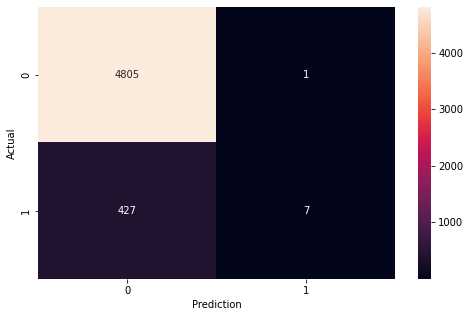

In [15]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4806
           1       0.88      0.02      0.03       434

    accuracy                           0.92      5240
   macro avg       0.90      0.51      0.49      5240
weighted avg       0.91      0.92      0.88      5240



In [17]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    sns.lineplot(fpr, tpr, label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


model AUC score: 0.5079604795081417



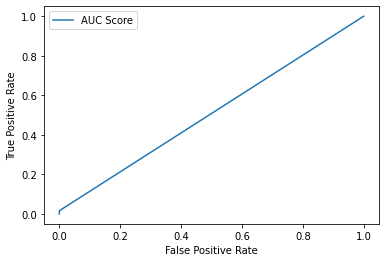

In [18]:
plot_roc_curve(y_test, y_pred, "AUC Score")
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [19]:
pd.DataFrame(data=[model.score(X_train, y_train)*100,
                   model.score(X_test, y_test)*100],
             index=['Model Score in Data Train', 'Model Score in Data Test'],
             columns=['Score (%)'])

,Score (%)
Model Score in Data Train,92.012978
Model Score in Data Test,91.832061


> The results of the model score for the train and test data are around 91%, so it can be said to be a good fit model, but a recall value of 0% is obtained. This recall value can cause problems, because when the model predicts that the customer will not have a problem with payment, the actual data is that the customer has a problem with payment, so this needs to be handled with optimization.

### Ensamble Learning

In [20]:
rf_pipe = Pipeline([('model', RandomForestClassifier())])
ab_pipe = Pipeline([('model', AdaBoostClassifier())])

In [21]:
models = [rf_pipe, ab_pipe]
models

[Pipeline(steps=[('model', RandomForestClassifier())]),
 Pipeline(steps=[('model', AdaBoostClassifier())])]

In [22]:
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)

    return scores_train.mean(), scores_test["test_score"].mean()

In [23]:
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    preds = models[i].predict(X_test)
    print("ensemble model", i)
    print(classification_report(y_test, preds))
    print("CV:", cv_score(models[i], X_train, y_train, "recall", 5))

ensemble model 0
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4806
           1       0.00      0.00      0.00       434

    accuracy                           0.92      5240
   macro avg       0.46      0.50      0.48      5240
weighted avg       0.84      0.92      0.88      5240

CV: (0.0, 0.9206546174918628)
ensemble model 1
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4806
           1       0.52      0.03      0.06       434

    accuracy                           0.92      5240
   macro avg       0.72      0.52      0.51      5240
weighted avg       0.89      0.92      0.88      5240

CV: (0.021801013084658184, 0.9185075912396794)


> The recall value for the two ensemble models is still 0, so data balancing must be done. In addition, the train and test scores have scores that are too far apart, namely 0 and 90%, so that it can be said to be an underfit model.

### Optimize

Handling Imbalanced Data

In [24]:
balanced = SMOTETomek()
X_train, y_train = balanced.fit_resample(X_train, y_train)

#### Logistic Regression

Hyperparameter Tuning

In [25]:
param = [{'solver': ['newton-cg', 'lbfgs', 'saga'],
          'penalty': ['l2', 'none'],
          'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          'C': [0.01, 0.1, 1],
          'l1_ratio': [0, 1]}]

In [26]:
model_ht = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, scoring="f1")

In [27]:
model_ht.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.01, 0.1, 1],
                                         'l1_ratio': [0, 1],
                                         'max_iter': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                         'penalty': ['l2', 'none'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'saga']}],
                   scoring='f1')

In [28]:
model_ht.best_params_

{'solver': 'newton-cg',
 'penalty': 'none',
 'max_iter': 60,
 'l1_ratio': 1,
 'C': 1}

Modeling

In [31]:
model_ht_tuned = LogisticRegression(solver="newton-cg", penalty="none", max_iter=60, C=1, l1_ratio=1)
model_ht_tuned.fit(X_train, y_train)

LogisticRegression(C=1, l1_ratio=1, max_iter=60, penalty='none',
                   solver='newton-cg')

Evaluation

In [32]:
scores_train = cross_val_score(model_ht_tuned, X_train, y_train, scoring='accuracy', cv=5)
for i, j in enumerate(scores_train):
    print(f"fold no. - {i}, score: {round(j, 2)}")

fold no. - 0, score: 0.71
fold no. - 1, score: 0.75
fold no. - 2, score: 0.76
fold no. - 3, score: 0.76
fold no. - 4, score: 0.75


In [33]:
scores_test = cross_validate(model_ht_tuned, X_train, y_train, cv=5)
for i, j in enumerate(scores_test["test_score"]):
    print(f"fold no. - {i}, score: {round(j, 2)}")

fold no. - 0, score: 0.71
fold no. - 1, score: 0.75
fold no. - 2, score: 0.76
fold no. - 3, score: 0.76
fold no. - 4, score: 0.75


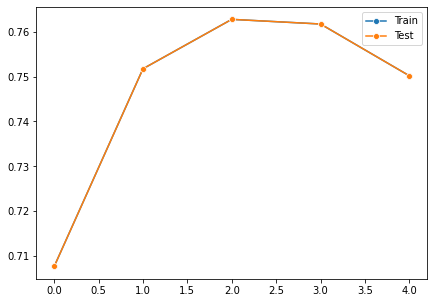

In [34]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=scores_train, label="Train", marker="o")
sns.lineplot(data=scores_test["test_score"], label="Test", marker="o")
plt.show()

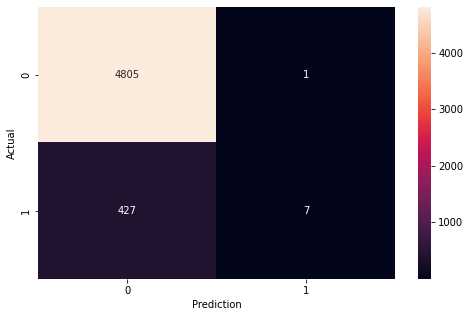

In [35]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [36]:
y_pred_ht_tuned = model_ht_tuned.predict(X_test)
print(classification_report(y_test, y_pred_ht_tuned))

              precision    recall  f1-score   support

           0       0.95      0.74      0.84      4806
           1       0.17      0.57      0.26       434

    accuracy                           0.73      5240
   macro avg       0.56      0.66      0.55      5240
weighted avg       0.89      0.73      0.79      5240




model AUC score: 0.6558612410370294



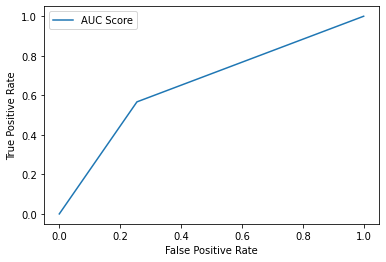

In [37]:
plot_roc_curve(y_test, y_pred_ht_tuned, "AUC Score")
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred_ht_tuned)}\n")
plt.show()

In [38]:
pd.DataFrame(data=[model_ht_tuned.score(X_train, y_train)*100,
                   model_ht_tuned.score(X_test, y_test)*100],
             index=['Model Score in Data Train', 'Model Score in Data Test'],
             columns=['Score (%)'])

,Score (%)
Model Score in Data Train,74.838041
Model Score in Data Test,73.015267


> For the logistic regression model which has been optimized with imlanaced data handling and hyperparameter tuning, it gets a score of 71% and 69% for the train and test data, so it can be said to be a goodfit model. Furthermore, an increase in recall was obtained to 58%. However, it is still in the low category, so it will be tried again with other models.

#### Ensemble Model

In [50]:
param = {"n_estimators": [100, 200, 300],
         "max_depth": [1, 3, 5, 7, 10, 15],
         "max_leaf_nodes": [1, 3, 5, 10]}

In [51]:
model = RandomForestClassifier()

In [52]:
model_ht = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, scoring="f1")

In [54]:
model_ht.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 10, 15],
                                        'max_leaf_nodes': [1, 3, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1')

In [55]:
model_ht.best_params_

{'n_estimators': 300, 'max_leaf_nodes': 10, 'max_depth': 5}

In [56]:
model_ht_tuned = RandomForestClassifier(n_estimators=300, max_leaf_nodes=10, max_depth=5)
model_ht_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, n_estimators=300)

In [57]:
scores_train = cross_val_score(model_ht_tuned, X_train, y_train, scoring='accuracy', cv=5)
for i, j in enumerate(scores_train):
    print(f"fold no. - {i}, score: {round(j, 2)}")

fold no. - 0, score: 0.75
fold no. - 1, score: 0.84
fold no. - 2, score: 0.85
fold no. - 3, score: 0.85
fold no. - 4, score: 0.85


In [58]:
scores_test = cross_validate(model_ht_tuned, X_train, y_train, cv=5)
for i, j in enumerate(scores_test["test_score"]):
    print(f"fold no. - {i}, score: {round(j, 2)}")

fold no. - 0, score: 0.74
fold no. - 1, score: 0.85
fold no. - 2, score: 0.85
fold no. - 3, score: 0.85
fold no. - 4, score: 0.84


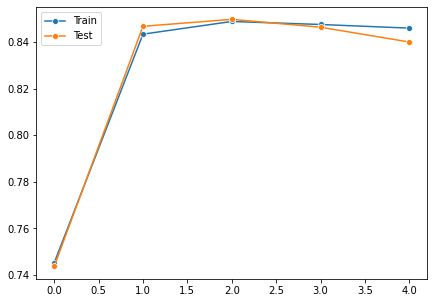

In [59]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=scores_train, label="Train", marker="o")
sns.lineplot(data=scores_test["test_score"], label="Test", marker="o")
plt.show()

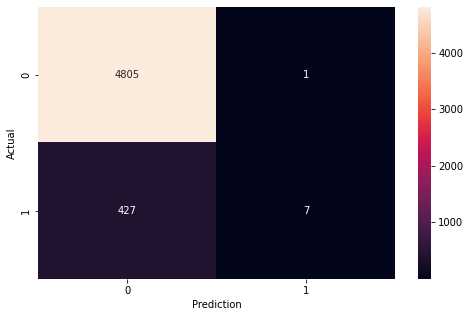

In [60]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [61]:
y_pred_ht_tuned = model_ht_tuned.predict(X_test)
print(classification_report(y_test, y_pred_ht_tuned))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      4806
           1       0.17      0.36      0.23       434

    accuracy                           0.80      5240
   macro avg       0.55      0.60      0.56      5240
weighted avg       0.87      0.80      0.83      5240




model AUC score: 0.5987906821542196



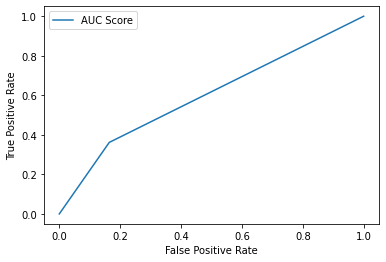

In [63]:
plot_roc_curve(y_test, y_pred_ht_tuned, "AUC Score")
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred_ht_tuned)}\n")
plt.show()

> The results of the Random Forest Classifier were obtained as reported above, where the recall value increased to 36% and the train and test scores showed a goodfit model, but a recall value of 36% still could not be said to be a good model, so adjustments had to be made at the preprocessing / hyperparameter stage tuning / etc.